### 1) Cabin 결측 여부를 변수로 만든 뒤 상관계수 히트맵 그리기

`Cabin` 컬럼의 결측 여부를 0/1로 표현하는 새로운 변수 `CabinMissing`을 만들고, 이를 포함한 상관계수 히트맵을 그리시오.

조건: `PassengerId` 제외, `cmap="coolwarm"`, `vmin=-1`, `vmax=1`

힌트

- `Cabin.isna()`
- `astype(int)`
- `corr(numeric_only=True)`

Text(0.5, 1.0, 'Cabin Missing Heatmap')

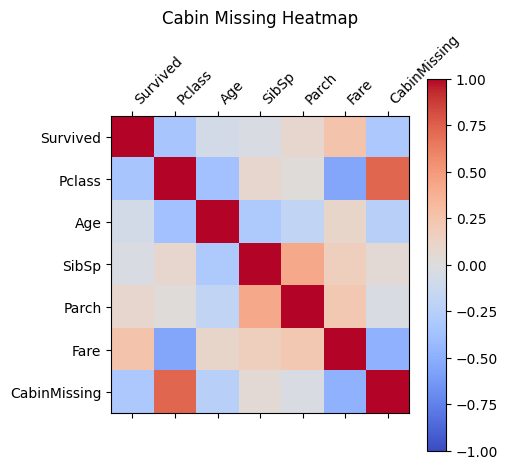

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  #Cabon은 객실번호
titanic02 = titanic.copy()
#print(titanic02)
titanic02["CabinMissing"] = titanic02["Cabin"].isna().astype(int)
corr_matrix = titanic02.drop("PassengerId", axis=1).corr(numeric_only=True)  #행렬 연산 -1~0~1
#print(titanic02["CabinMissing"])
plt.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)  
#테이터의 최소 / 최대값을 사용 -1~0~1  만약 vmax, vmin이 없으면 만약 최대값이 0.4면 0.4가 제일 빨간색이 된다.
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Cabin Missing Heatmap")


### 2) Name에서 호칭(Title) 추출 후 히트맵

`Name` 컬럼에서 호칭(Mr, Mrs, Miss, Master, Other)을 추출해 숫자로 인코딩한 뒤 상관계수 히트맵을 그리시오.

조건: `PassengerId` 제외, `cmap="RdBu_r"`

힌트

- `str.extract()`
- `replace()`
- 범주형 → 숫자형 변환

([<matplotlib.axis.YTick at 0x2a39192b390>,
 [Text(0, 0, 'Survived'),
  Text(0, 1, 'Pclass'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch'),
  Text(0, 5, 'Fare'),
  Text(0, 6, 'TitleCode')])

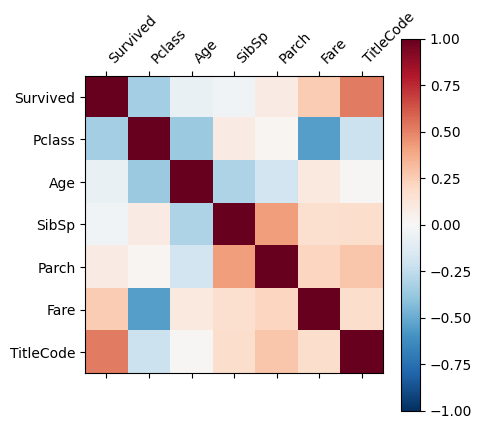

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  #Cabon은 객실번호
titanic02 = titanic.copy()
titanic02["Title"] = titanic02["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)  #str앞에 r을 붙이면 있는 그래도 읽어라
#pandas에서 줄 단위는 Series , 가로세로는 DataFrame이라고 한다.  expand=False가 있으면 Series로 리턴해라
#print(titanic02["Title"])

titanic02["Title"] = titanic02["Title"].replace({"Mlle":"Miss","Ms":"Miss","Mme":"Mr"})
titanic02["Title"] = titanic02["Title"].where(titanic02["Title"].isin(["Mr","Mrs","Miss","Master"]),"Other")
#print(titanic02["Title"].tail(10))
title_map = {"Mr":0,"Mrs":1, "Miss":2,"Mrs":3,"Other":4}
titanic02["TitleCode"] = titanic02["Title"].map(title_map)
#print(titanic02)
corr_matrix = titanic02.drop("PassengerId", axis=1).corr(numeric_only=True)
plt.matshow(corr_matrix,cmap="RdBu_r", vmax=1, vmin=-1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)



### 3) FamilySize, IsAlone 파생변수 포함 히트맵

`FamilySize = SibSp + Parch + 1`

`IsAlone = (FamilySize == 1)`

위 두 변수를 추가한 뒤 상관계수 히트맵을 그리시오.

힌트

- 불리언(boolean)은 자동으로 0/1 처리됨
- `drop("PassengerId", axis=1)`

([<matplotlib.axis.YTick at 0x2a395051450>,
 [Text(0, 0, 'Survived'),
  Text(0, 1, 'Pclass'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch'),
  Text(0, 5, 'Fare'),
  Text(0, 6, 'FamilySize'),
  Text(0, 7, 'IsAlone')])

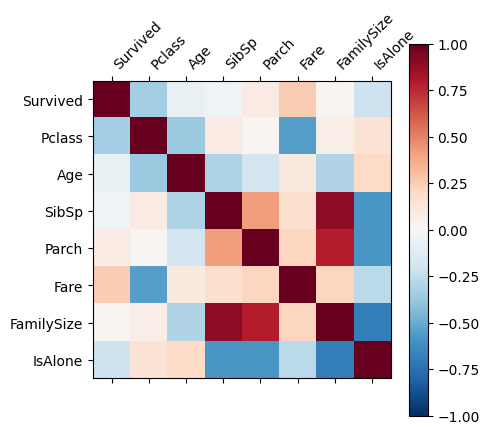

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  #Cabon은 객실번호
titanic02 = titanic.copy()

titanic02["FamilySize"] = titanic02["SibSp"]+titanic02["Parch"] + 1
titanic02["IsAlone"] = (titanic02["FamilySize"]==1).astype(int)
#print(titanic02)  이렇게 쓰면 컬럼이 많아서 짤릴 수 있음
#print(titanic02[["FamilySize","IsAlone"]]) 필요하면 요렇게 쓰면 됨


corr_matrix = titanic02.drop("PassengerId", axis=1).corr(numeric_only=True)
plt.matshow(corr_matrix,cmap="RdBu_r", vmax=1, vmin=-1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)


### 4) Fare 로그 변환 전/후 상관계수 히트맵 비교

`FareLog = log1p(Fare)`를 생성하고

(왼쪽) Fare 원본, (오른쪽) FareLog 포함 히트맵을 나란히 비교하시오.

힌트

- `np.log1p()`
- `subplot(1,2,…)`

C:\Users\201-08\AppData\Roaming\Python\Python314\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


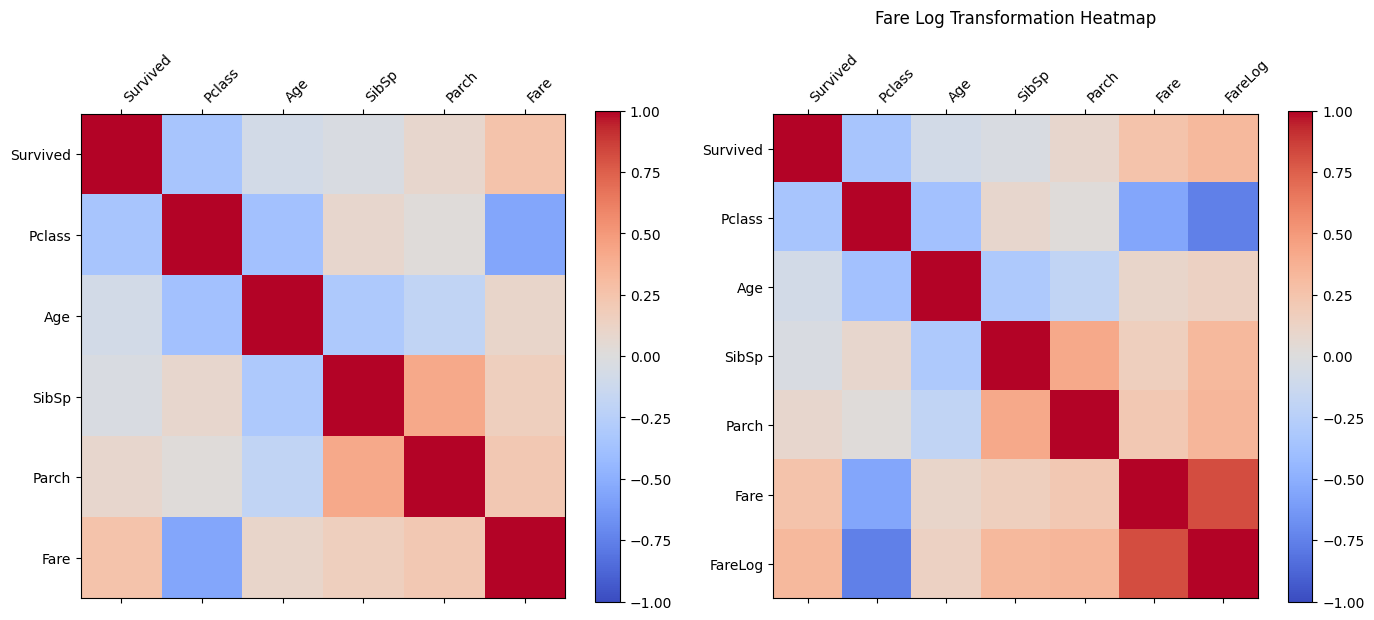

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  #Cabon은 객실번호
titanic02 = titanic.copy()

corr01 = titanic02.drop("PassengerId", axis=1).corr(numeric_only=True)
titanic03 = titanic.copy()
titanic03["FareLog"] = np.log(titanic03["Fare"])
corr02 = titanic03.drop("PassengerId", axis=1).corr(numeric_only=True)
plt.figure(figsize=(14,6))  #가로세로 크기 조절 단위는 인치
plt.subplot(1,2,1)  #1행 2열 중 첫번째
plt.matshow(corr01, cmap="coolwarm", vmin=-1, vmax=1, fignum=False)
plt.colorbar()
plt.xticks(range(len(corr01.columns)), corr01.columns, rotation=45, ha="left")
plt.yticks(range(len(corr01.columns)), corr01.columns)
plt.subplot(1,2,2)  #1행 2열 중 두번째
plt.matshow(corr02, cmap="coolwarm", vmin=-1, vmax=1, fignum=False)
plt.colorbar()
plt.xticks(range(len(corr02.columns)), corr02.columns, rotation=45, ha="left")
plt.yticks(range(len(corr02.columns)), corr02.columns)
plt.title("Fare Log Transformation Heatmap", pad=20)  #pad는 제목과 그래프 사이의 간격 조절
plt.tight_layout()  #자동 간격 조절
plt.show()

### 5) Age 결측치 처리 방식에 따른 히트맵 비교

(왼쪽) `dropna()`

(오른쪽) `Age`를 중앙값으로 채운 뒤

각각 상관계수 히트맵을 그리시오.

힌트

- `Age.median()`
- `fillna()`

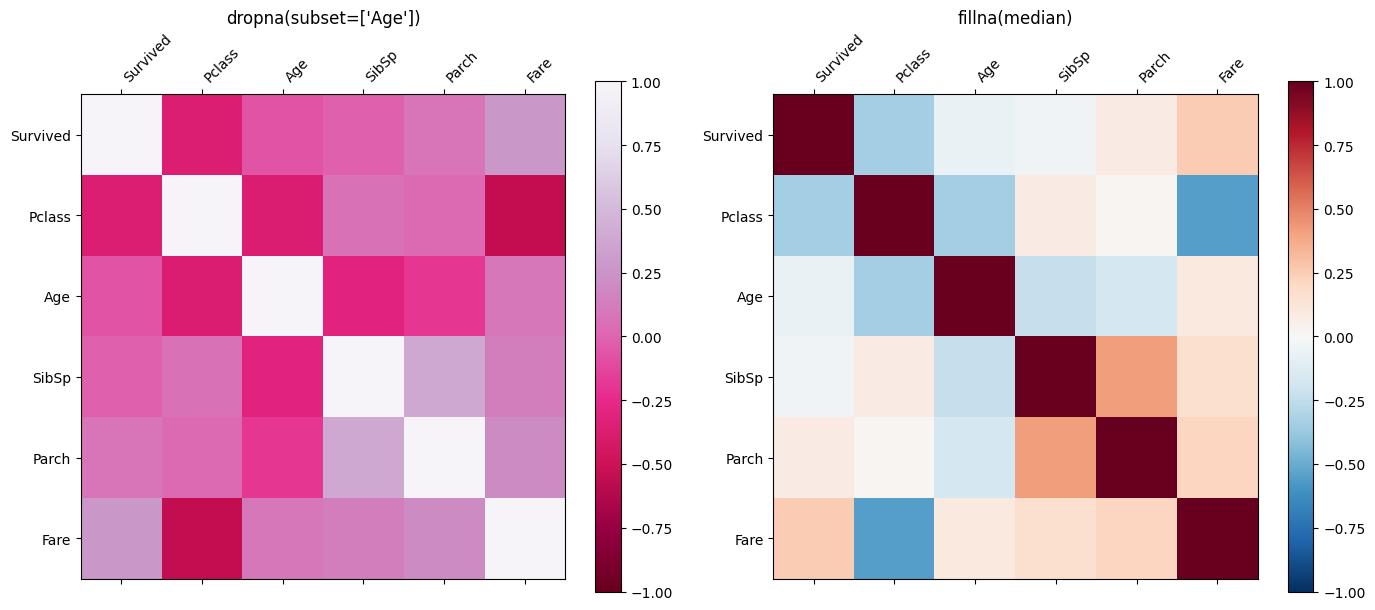

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  #Cabon은 객실번호

titanic02 = titanic.copy()
titanic02 = titanic02.dropna(subset=["Age"])  #Age 결측치가 있는 행을 삭제
corr01 = titanic02.drop("PassengerId", axis=1).corr(numeric_only=True)

titanic03 = titanic.copy()
titanic03["Age"] = titanic03["Age"].fillna(titanic03["Age"].median())  #결측를 중앙값으로 채움
corr02 = titanic03.drop("PassengerId", axis=1).corr(numeric_only=True)

plt.figure(figsize=(14,6))  #가로세로 크기 조절 단위는 인치
plt.subplot(1,2,1)  #1행 2열 중 첫번째
plt.matshow(corr01, cmap="PuRd_r", vmin=-1, vmax=1, fignum=False)
plt.colorbar()
plt.xticks(range(len(corr01.columns)), corr01.columns, rotation=45, ha="left")
plt.yticks(range(len(corr01.columns)), corr01.columns)
plt.title("dropna(subset=['Age'])")  #pad는 제목과 그래프 사이의 간격 조절

plt.subplot(1,2,2)  #1행 2열 중 두번째
plt.matshow(corr02, cmap="RdBu_r", vmin=-1, vmax=1, fignum=False)
plt.colorbar()
plt.xticks(range(len(corr02.columns)), corr02.columns, rotation=45, ha="left")
plt.yticks(range(len(corr02.columns)), corr02.columns)
plt.title("fillna(median)")  
plt.tight_layout()  #자동 간격 조절
plt.show()

### 6) 연령대별 생존률 면적 그래프 (10세 단위)

나이를 0~80까지 10세 단위로 구간화한 뒤,

연령대별 생존률을 계산하여 면적 그래프로 표현하시오.

힌트

- `pd.cut()`
- `groupby([age_group, "Survived"]).size()`
- `생존 / (생존 + 사망)`

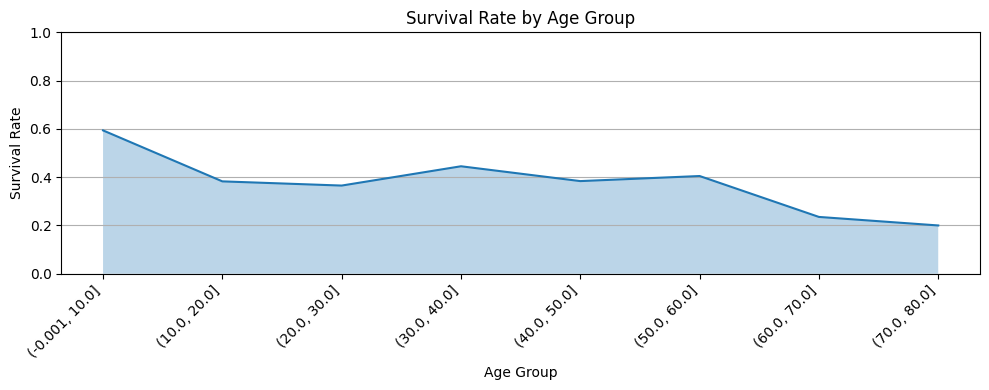

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  
titanic02 = titanic.dropna(subset=["Age"]).copy()  #Age 결측치가 있는 행을 삭제
age_group = pd.cut(titanic02["Age"], bins=range(0,81,10), right=True, include_lowest=True)  
#right=True이면 구간의 오른쪽이 닫힌 구간 , include_lowest=True이면 첫 구간에 최솟값 포함
#0~10, 10~20, 20~30, ..., 70~80
counts = titanic02.groupby([age_group,"Survived"], observed=False).size().unstack(fill_value=0)
#observed=False는 카테고리형 변수를 그룹화할 때 모든 가능한 조합을 포함
survived = counts.get(1,0)
dead   = counts.get(0,0)
rate = survived / (survived + dead)
x =  rate.index.astype(str)
y = rate.values

plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.fill_between(range(len(x)),y,alpha=0.3)
plt.xticks(range(len(x)), x, rotation=45, ha="right")
plt.ylim(0,1)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group") 
plt.grid(axis="y")
plt.tight_layout()

### 7) 연령대별 사망률 면적 그래프

6번과 동일한 연령 구간을 사용하되,

사망률을 계산하여 면적 그래프로 표현하시오.

힌트

- `사망 / 전체`
- `fill_between()`
- `plt.ylim(0,1)`

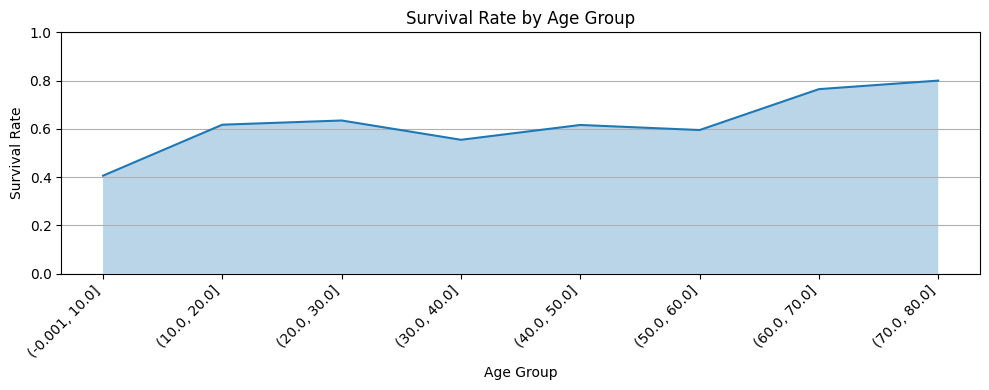

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  
titanic02 = titanic.dropna(subset=["Age"]).copy()  #Age 결측치가 있는 행을 삭제
age_group = pd.cut(titanic02["Age"], bins=range(0,81,10), right=True, include_lowest=True)  
#right=True이면 구간의 오른쪽이 닫힌 구간 , include_lowest=True이면 첫 구간에 최솟값 포함
#0~10, 10~20, 20~30, ..., 70~80
counts = titanic02.groupby([age_group,"Survived"], observed=False).size().unstack(fill_value=0)
#observed=False는 카테고리형 변수를 그룹화할 때 모든 가능한 조합을 포함
survived = counts.get(1,0)
dead   = counts.get(0,0)
dead_rate = dead / (survived + dead)
x_lbl =  dead_rate.index.astype(str)
y = dead_rate.values

plt.figure(figsize=(10,4))
plt.plot(x_lbl,y)
plt.fill_between(range(len(x_lbl)),y,alpha=0.3)
plt.xticks(range(len(x_lbl)), x_lbl, rotation=45, ha="right")
plt.ylim(0,1)
plt.title("Death Rate by Age Group")
plt.ylabel("Death Rate")
plt.xlabel("Age Group") 
plt.grid(axis="y")
plt.tight_layout()

### 8) Fare 분위수 구간별 생존률 면적 그래프

`Fare`를 8개 분위수 구간으로 나눈 뒤,

각 구간의 생존률을 면적 그래프로 표현하시오.

힌트

- `pd.qcut(Fare, q=8)`
- 구간 라벨은 문자열로 변환

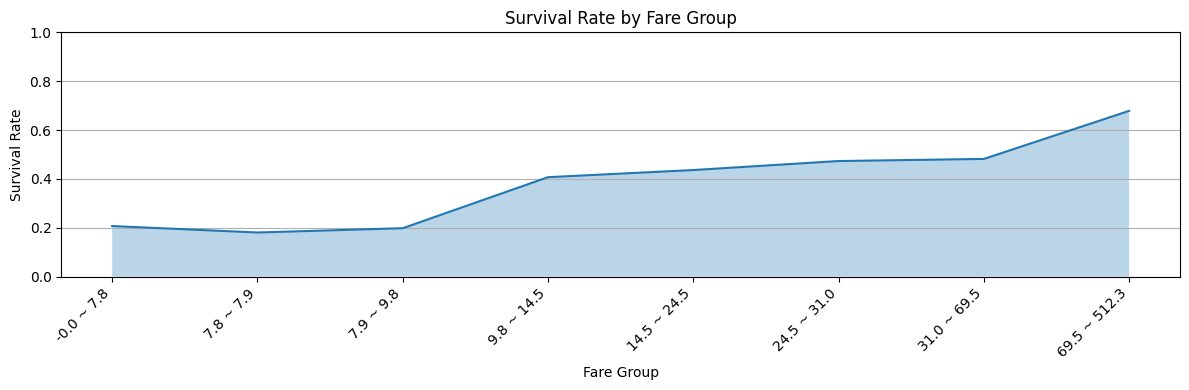

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  
titanic02 = titanic.dropna(subset=["Fare"]).copy()  #Age 결측치가 있는 행을 삭제
fare_group = pd.qcut(titanic02["Fare"], q=8)  
#right=True이면 구간의 오른쪽이 닫힌 구간 , include_lowest=True이면 첫 구간에 최솟값 포함
#0~10, 10~20, 20~30, ..., 70~80
counts = titanic02.groupby([fare_group,"Survived"], observed=False).size().unstack(fill_value=0)
#observed=False는 카테고리형 변수를 그룹화할 때 모든 가능한 조합을 포함
survived = counts.get(1,0)
dead   = counts.get(0,0)
rate = survived / (survived + dead)
#x =  rate.index.astype(str)
x= [f"{interval.left:.1f} ~ {interval.right:.1f}" for interval in rate.index]
y = rate.values

plt.figure(figsize=(12,4))
plt.plot(x,y)
plt.fill_between(range(len(x)),y,alpha=0.3)
plt.xticks(range(len(x)), x, rotation=45, ha="right")
plt.ylim(0,1)
plt.title("Survival Rate by Fare Group")
plt.ylabel("Survival Rate")
plt.xlabel("Fare Group") 
plt.grid(axis="y")
plt.tight_layout()

### 9) Embarked별 생존률 면적 그래프 (3개 세로 배치)

`Embarked` 값(C, S, Q)별로 데이터를 나누고,

각 그룹에서 연령대별 생존률 면적 그래프를 그리시오.

힌트

- `subplot(3,1,…)`
- `for port in ["C","S","Q"]`

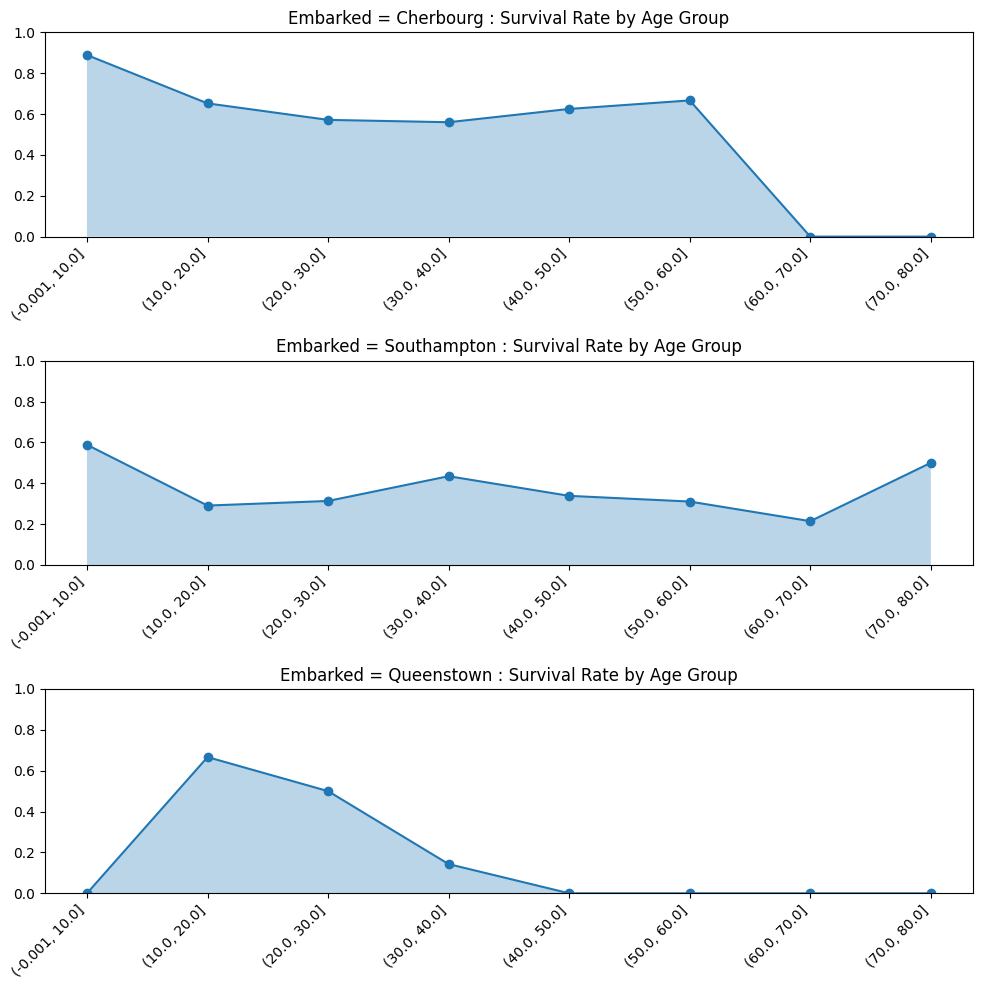

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  

ports = ["C","S","Q"]
ports_labels = {"C":"Cherbourg","S":"Southampton","Q":"Queenstown"}

plt.figure(figsize=(10,10))
for idx, port in enumerate(ports,start=1):
  sub =  titanic[(titanic["Embarked"]==port)].dropna(subset=["Age"]).copy()
  age_group = pd.cut(sub["Age"], bins=range(0,81,10), right=True, include_lowest=True)
  counts = sub.groupby([age_group,"Survived"], observed=False).size().unstack(fill_value=0)
  #print(counts)
  survived = counts.get(1,0)
  dead   = counts.get(0,0)
  rate = survived / (survived + dead)
  x =  rate.index.astype(str) 
  y = rate.values

  plt.subplot(3,1,idx)
  plt.plot(range(len(x)),y, marker="o", label=f"Port {port}") 
  plt.fill_between(range(len(x)),y,alpha=0.3)
  plt.xticks(range(len(x)), x, rotation=45, ha="right")
  plt.ylim(0,1)
  plt.title(f"Embarked = {ports_labels[port]} : Survival Rate by Age Group")
plt.tight_layout()


### 10) Pclass별 생존/사망 누적 면적 그래프

연령대를 5세 단위로 나눈 뒤,

Pclass(1,2,3) 각각에 대해 사망자 위에 생존자가 누적되는 면적 그래프를 그리시오.

힌트

- `fill_between(x, dead)`
- `fill_between(x, dead + survived)`
- 누적(stacked) 개념 사용

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

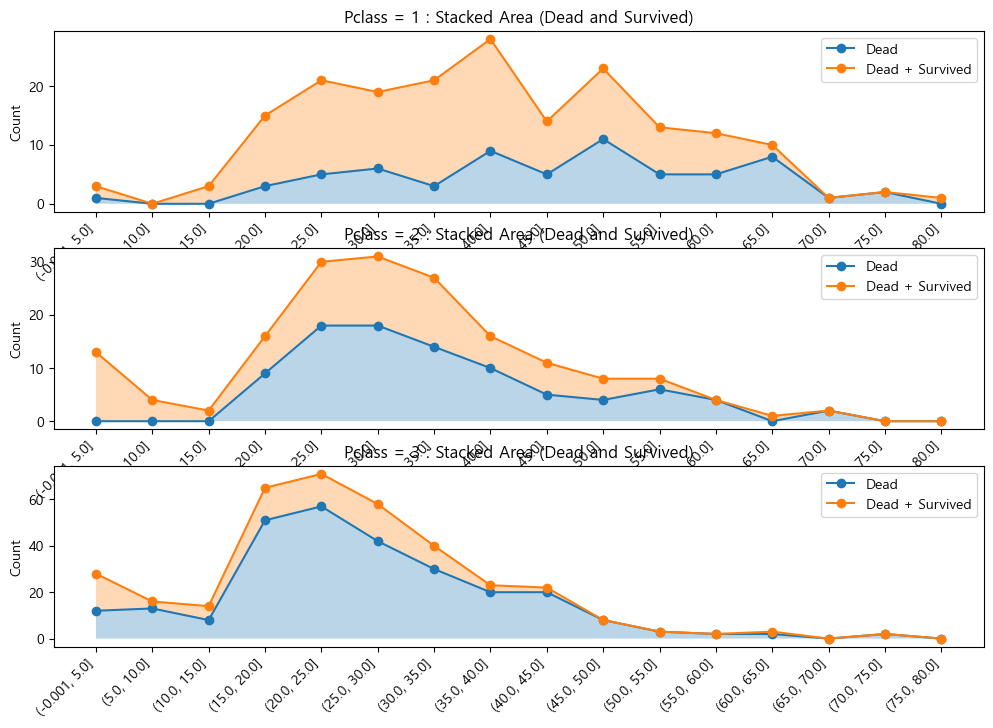

In [ ]:
# heatmap (컬러로 변환된 2D 배열 시각화)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"  # 윈도우 기본 한글 폰트
plt.rcParams["axes.unicode_minus"] = False

titanic = pd.read_csv("./titanic.csv")
df = titanic.dropna(subset=["Age"]).copy()
age_group = pd.cut(df["Age"], bins=range(0, 81, 5), right=True, include_lowest=True)

plt.figure(figsize=(12, 8))

for i, pclass in enumerate([1, 2, 3], start=1):
    sub = df[df["Pclass"] == pclass].copy()
    counts = (
        sub.groupby([age_group[sub.index], "Survived"], observed=False)
        .size()
        .unstack(fill_value=0)
    )

    dead = counts.get(0, 0)
    survived = counts.get(1, 0)

    x_lbl = counts.index.astype(str)
    x = range(len(x_lbl))

    plt.subplot(3, 1, i)
    plt.plot(x, dead.values, marker="o", label="Dead")
    plt.plot(x, (dead + survived).values, marker="o", label="Dead+Survived")

    # 누적 면적: 아래(dead) + 위(dead+survived)
    plt.fill_between(x, dead.values, alpha=0.3)
    plt.fill_between(x, (dead + survived).values, dead.values, alpha=0.3)

    plt.xticks(x, x_lbl, rotation=45, ha="right")
    plt.title(f"Pclass = {pclass} : Stacked Area (Dead then Survived)")
    plt.ylabel("Count")
    plt.legend(loc="upper right")

plt.tight_layout()

